# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Receiving objects: 100% (10/10), 11.01 MiB | 6.33 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (6/6), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

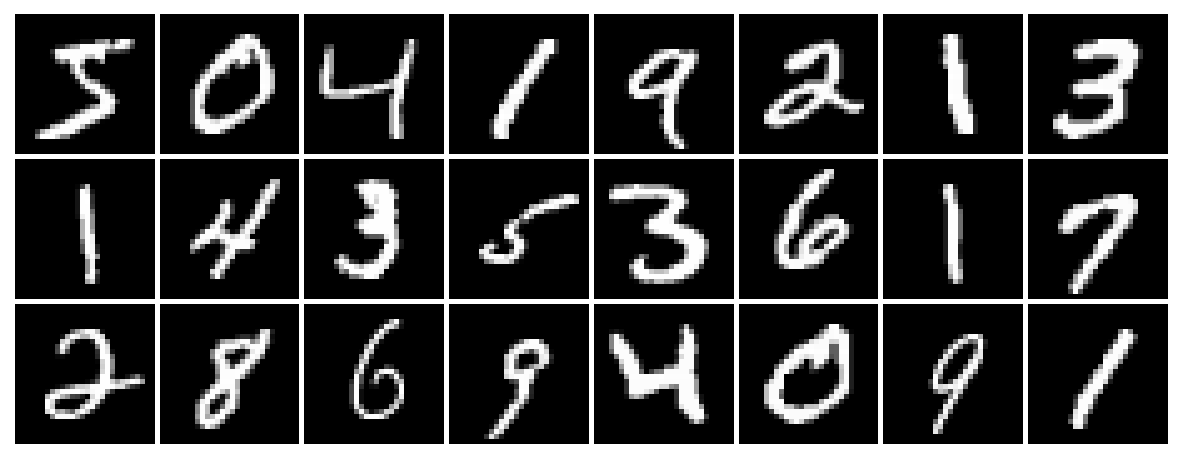

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


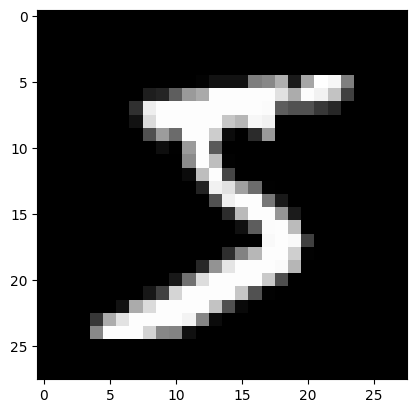

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [9]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [11]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[-0.0855, -0.0723,  0.1994, -0.3584,  0.0699,  0.0243,  0.0425,  0.2138,
         -0.2570,  0.0945],
        [-0.0961,  0.1170,  0.2004, -0.3000, -0.0195,  0.0571,  0.0043,  0.1788,
         -0.2323,  0.1478],
        [-0.0681,  0.1751,  0.1089, -0.2317, -0.4287, -0.1892,  0.0255,  0.1407,
          0.1060, -0.1582],
        [-0.1366, -0.1236,  0.1019, -0.1315,  0.0704, -0.1550,  0.2215,  0.0424,
         -0.1828, -0.1103],
        [-0.0152,  0.1169,  0.1509, -0.0326, -0.1013, -0.0916,  0.0599,  0.0747,
         -0.0498, -0.0364]], grad_fn=<AddmmBackward0>)

In [12]:
import torch.nn.functional as F
F.softmax(score,dim=1)*100

tensor([[ 9.1636,  9.2845, 12.1838,  6.9747, 10.7038, 10.2262, 10.4147, 12.3599,
          7.7188, 10.9699],
        [ 8.9173, 11.0354, 11.9948,  7.2726,  9.6271, 10.3936,  9.8585, 11.7386,
          7.7815, 11.3806],
        [ 9.6750, 12.3393, 11.5486,  8.2151,  6.7464,  8.5721, 10.6248, 11.9221,
         11.5149,  8.8417],
        [ 9.0032,  9.1209, 11.4280,  9.0489, 11.0733,  8.8390, 12.8800, 10.7679,
          8.5963,  9.2426],
        [ 9.7413, 11.1174, 11.5016,  9.5728,  8.9372,  9.0243, 10.5013, 10.6576,
          9.4100,  9.5366]], grad_fn=<MulBackward0>)

In [13]:
x_train[:5].view(-1,28*28)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

## Treinamento

### Inicialização dos parâmetros

In [14]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [15]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-aza_fef6
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-aza_fef6
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.10

In [16]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3423, grad_fn=<NllLossBackward0>)

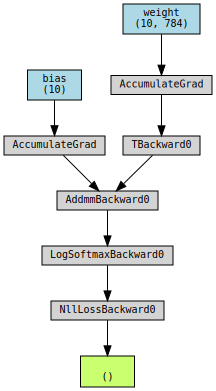

In [17]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

Época: (1/100)
Perda: 0.047672733664512634
Acurácia: 1.0

Nº 4:


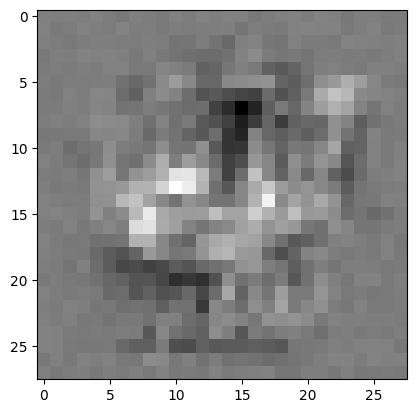

Época: (2/100)
Perda: 0.047623440623283386
Acurácia: 1.0

Nº 4:


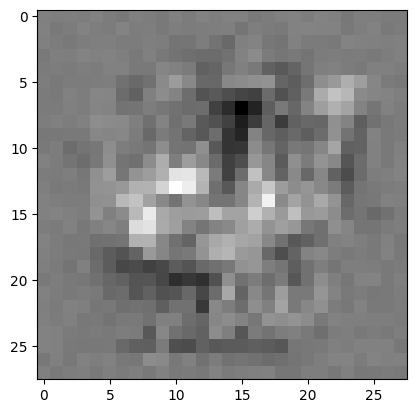

Época: (3/100)
Perda: 0.047574255615472794
Acurácia: 1.0

Nº 4:


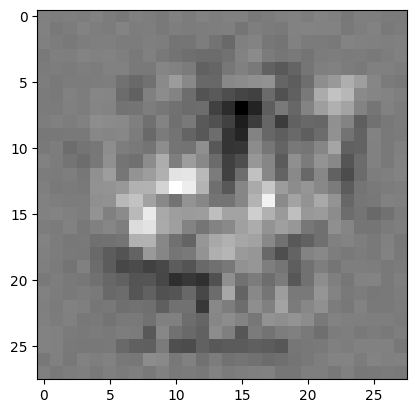

Época: (4/100)
Perda: 0.047525160014629364
Acurácia: 1.0

Nº 4:


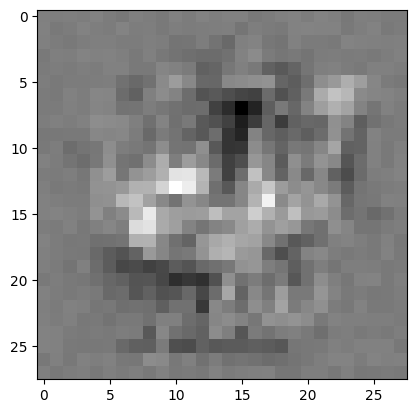

Época: (5/100)
Perda: 0.047476157546043396
Acurácia: 1.0

Nº 4:


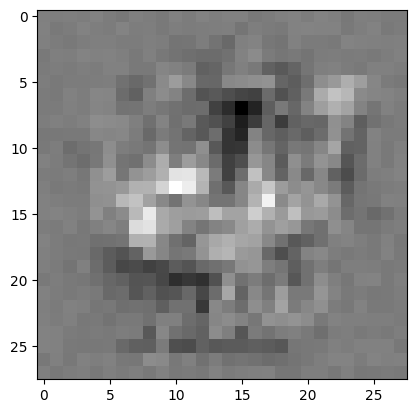

Época: (6/100)
Perda: 0.04742726311087608
Acurácia: 1.0

Nº 4:


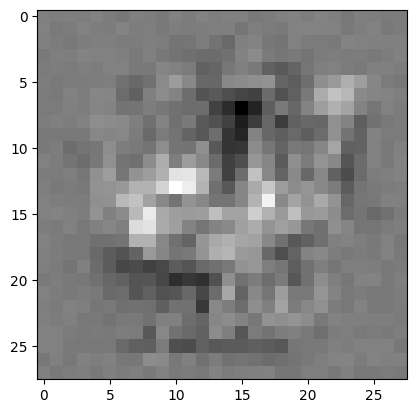

Época: (7/100)
Perda: 0.047378458082675934
Acurácia: 1.0

Nº 4:


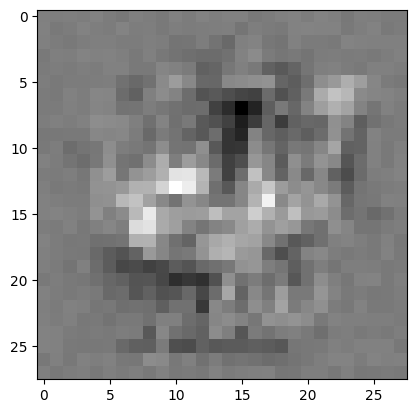

Época: (8/100)
Perda: 0.04732975736260414
Acurácia: 1.0

Nº 4:


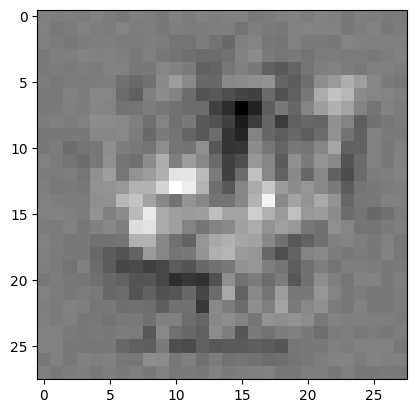

Época: (9/100)
Perda: 0.04728115350008011
Acurácia: 1.0

Nº 4:


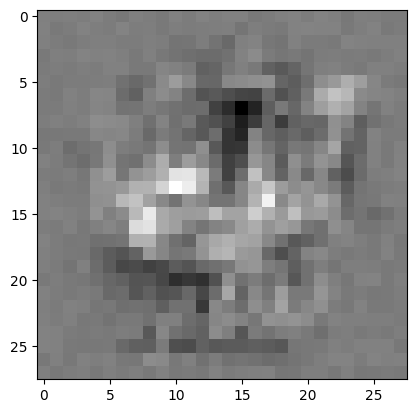

Época: (10/100)
Perda: 0.04723263904452324
Acurácia: 1.0

Nº 4:


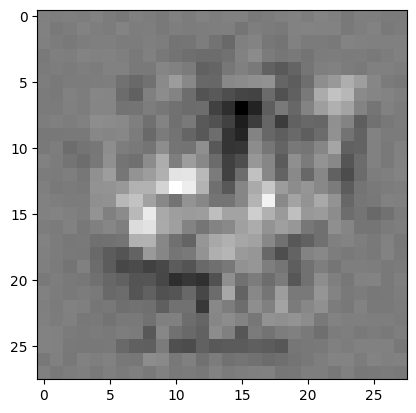

Época: (11/100)
Perda: 0.04718422144651413
Acurácia: 1.0

Nº 4:


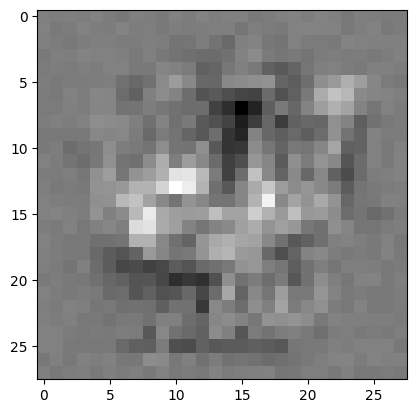

Época: (12/100)
Perda: 0.047135915607213974
Acurácia: 1.0

Nº 4:


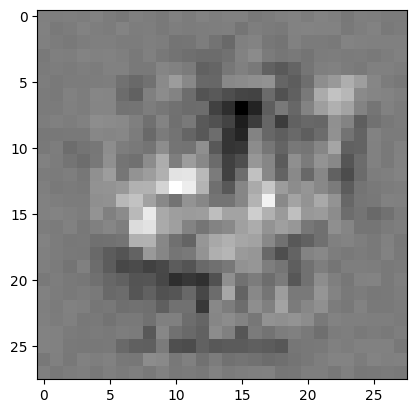

Época: (13/100)
Perda: 0.04708769544959068
Acurácia: 1.0

Nº 4:


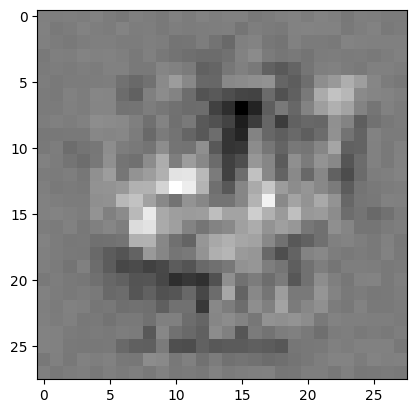

Época: (14/100)
Perda: 0.047039568424224854
Acurácia: 1.0

Nº 4:


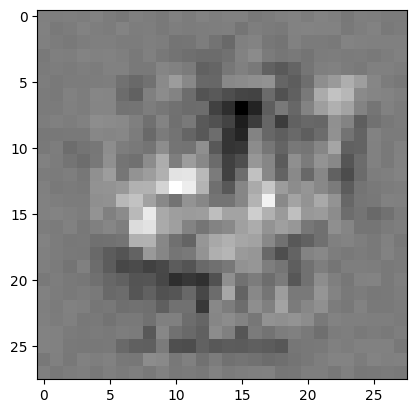

Época: (15/100)
Perda: 0.04699154570698738
Acurácia: 1.0

Nº 4:


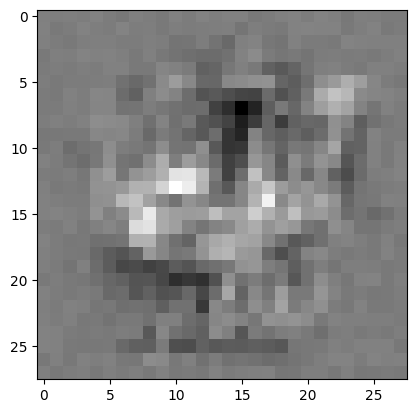

Época: (16/100)
Perda: 0.04694361239671707
Acurácia: 1.0

Nº 4:


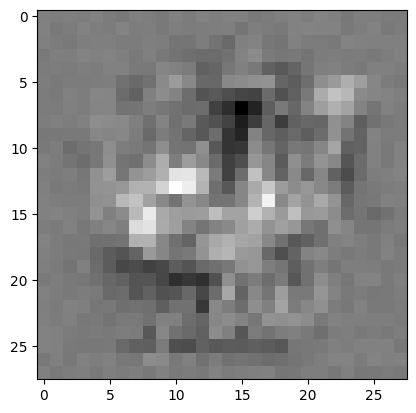

Época: (17/100)
Perda: 0.046895768493413925
Acurácia: 1.0

Nº 4:


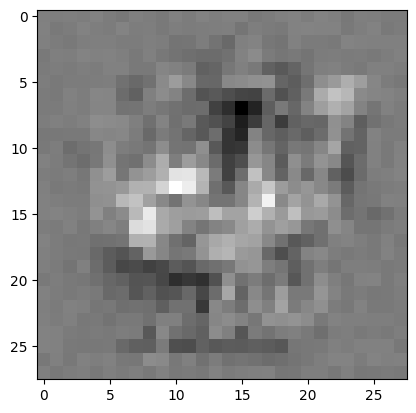

Época: (18/100)
Perda: 0.046848028898239136
Acurácia: 1.0

Nº 4:


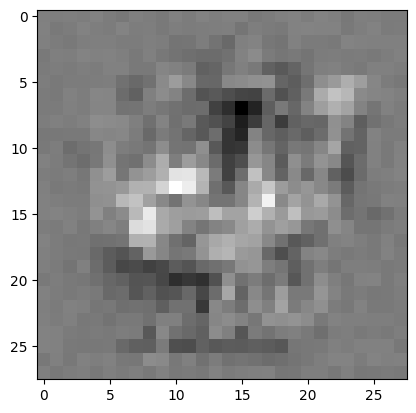

Época: (19/100)
Perda: 0.04680037871003151
Acurácia: 1.0

Nº 4:


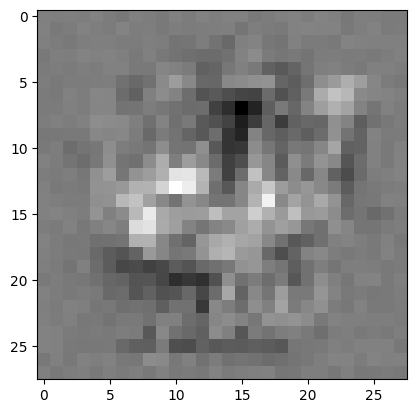

Época: (20/100)
Perda: 0.046752817928791046
Acurácia: 1.0

Nº 4:


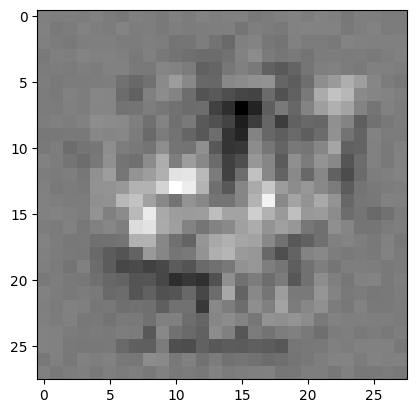

Época: (21/100)
Perda: 0.04670535400509834
Acurácia: 1.0

Nº 4:


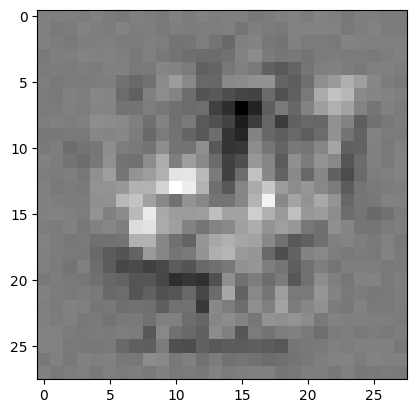

Época: (22/100)
Perda: 0.0466579869389534
Acurácia: 1.0

Nº 4:


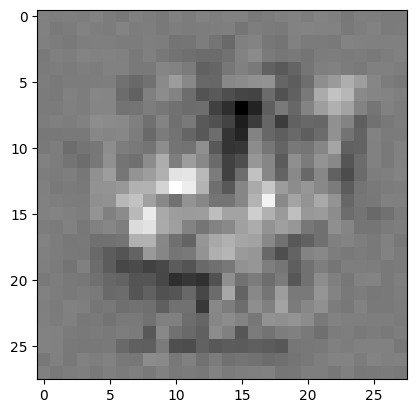

Época: (23/100)
Perda: 0.04661071300506592
Acurácia: 1.0

Nº 4:


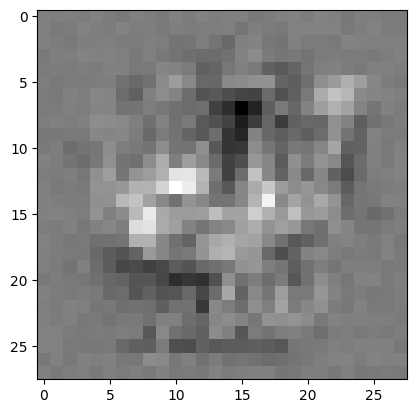

Época: (24/100)
Perda: 0.046563521027565
Acurácia: 1.0

Nº 4:


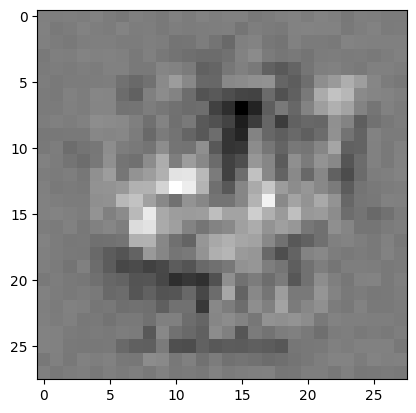

Época: (25/100)
Perda: 0.04651644453406334
Acurácia: 1.0

Nº 4:


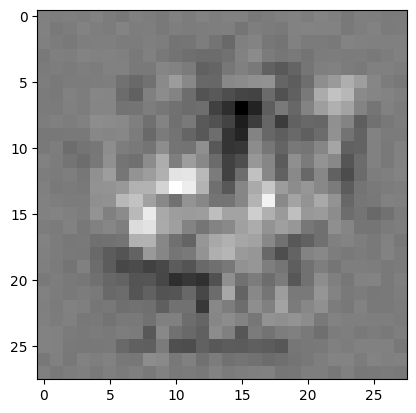

Época: (26/100)
Perda: 0.046469442546367645
Acurácia: 1.0

Nº 4:


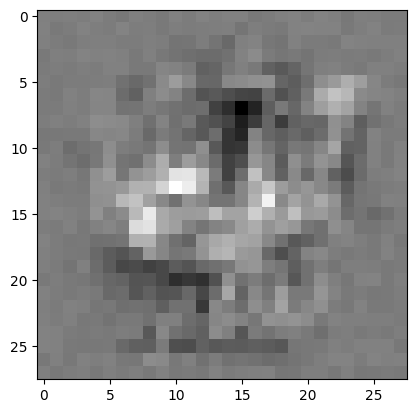

Época: (27/100)
Perda: 0.04642254114151001
Acurácia: 1.0

Nº 4:


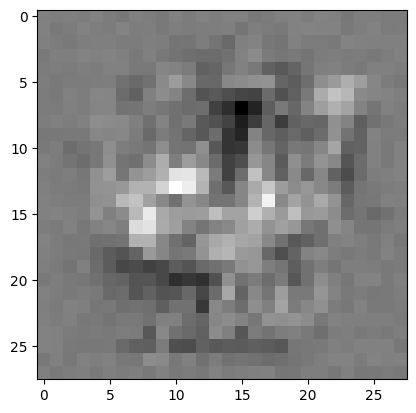

Época: (28/100)
Perda: 0.04637572541832924
Acurácia: 1.0

Nº 4:


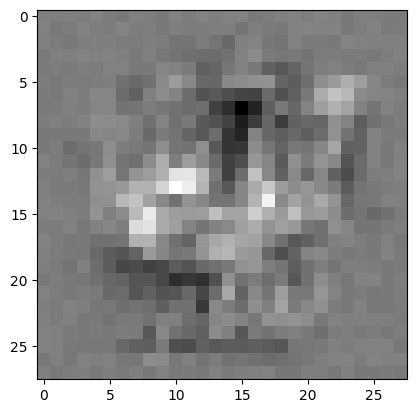

Época: (29/100)
Perda: 0.04632899537682533
Acurácia: 1.0

Nº 4:


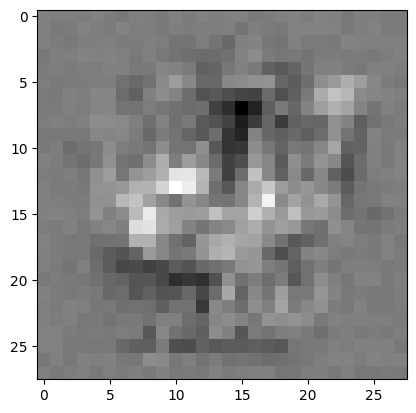

Época: (30/100)
Perda: 0.04628237709403038
Acurácia: 1.0

Nº 4:


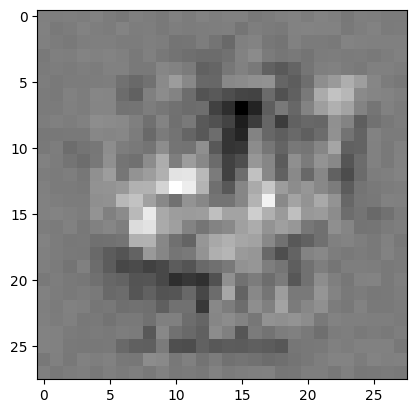

Época: (31/100)
Perda: 0.0462358221411705
Acurácia: 1.0

Nº 4:


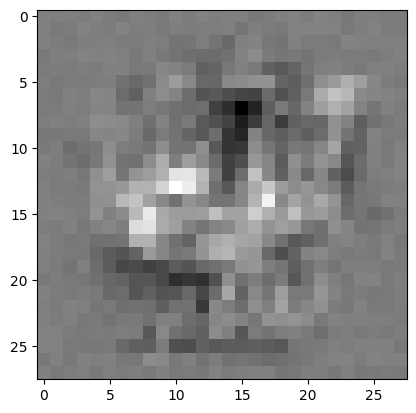

Época: (32/100)
Perda: 0.04618937894701958
Acurácia: 1.0

Nº 4:


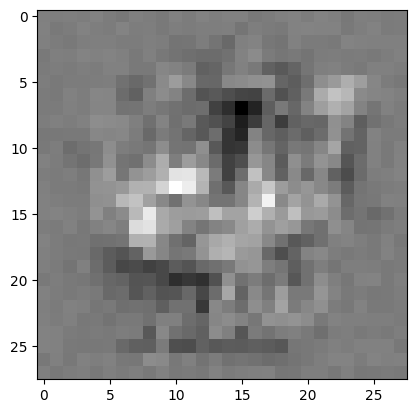

Época: (33/100)
Perda: 0.046143028885126114
Acurácia: 1.0

Nº 4:


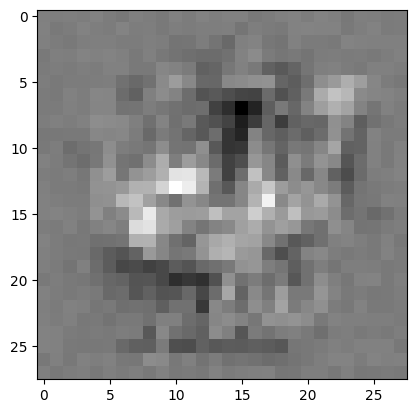

Época: (34/100)
Perda: 0.04609675332903862
Acurácia: 1.0

Nº 4:


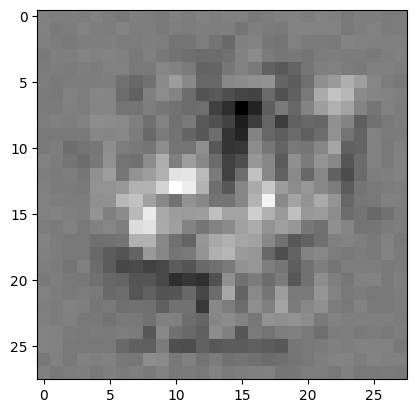

Época: (35/100)
Perda: 0.046050578355789185
Acurácia: 1.0

Nº 4:


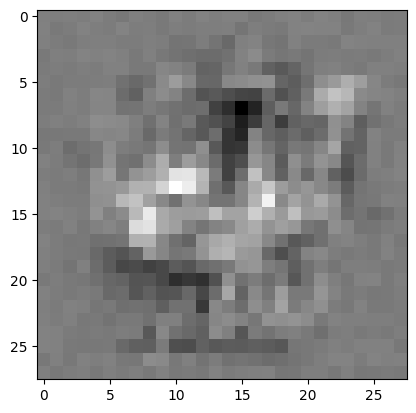

Época: (36/100)
Perda: 0.04600449278950691
Acurácia: 1.0

Nº 4:


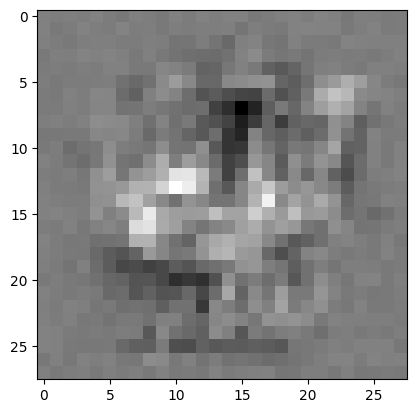

Época: (37/100)
Perda: 0.045958489179611206
Acurácia: 1.0

Nº 4:


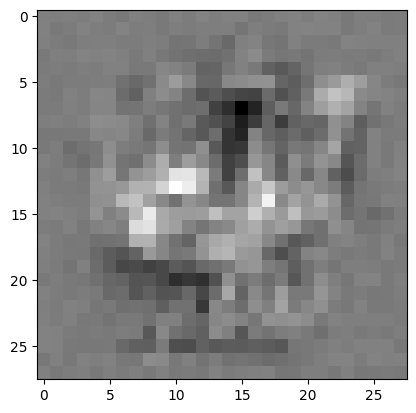

Época: (38/100)
Perda: 0.04591258987784386
Acurácia: 1.0

Nº 4:


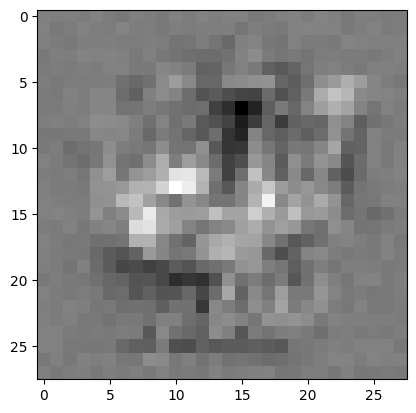

Época: (39/100)
Perda: 0.04586676135659218
Acurácia: 1.0

Nº 4:


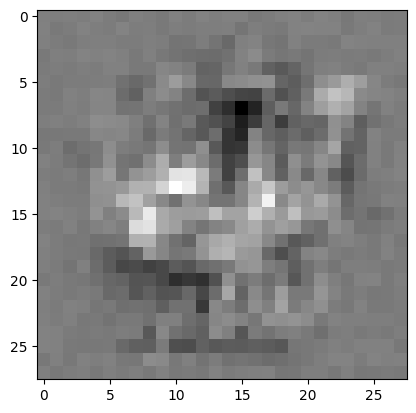

Época: (40/100)
Perda: 0.04582103341817856
Acurácia: 1.0

Nº 4:


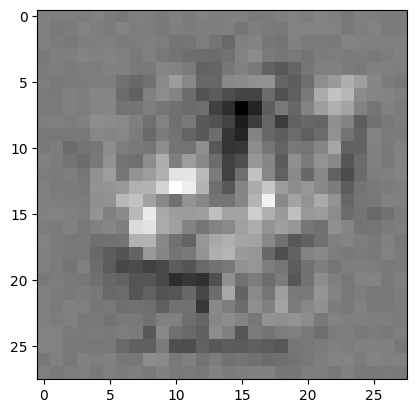

Época: (41/100)
Perda: 0.04577537626028061
Acurácia: 1.0

Nº 4:


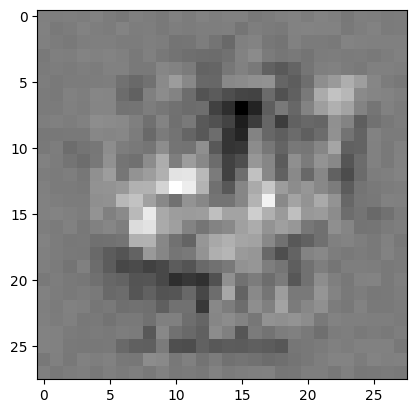

Época: (42/100)
Perda: 0.04572983831167221
Acurácia: 1.0

Nº 4:


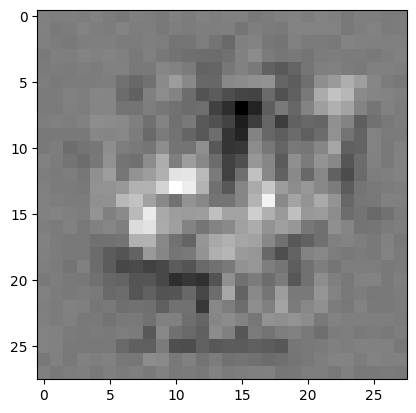

Época: (43/100)
Perda: 0.04568437486886978
Acurácia: 1.0

Nº 4:


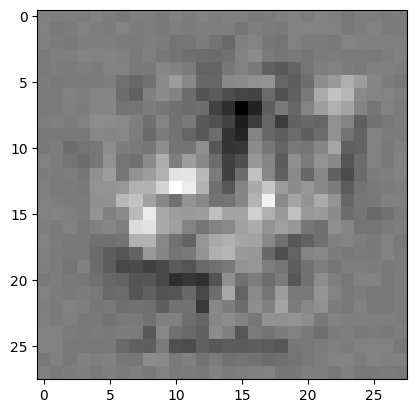

Época: (44/100)
Perda: 0.04563898965716362
Acurácia: 1.0

Nº 4:


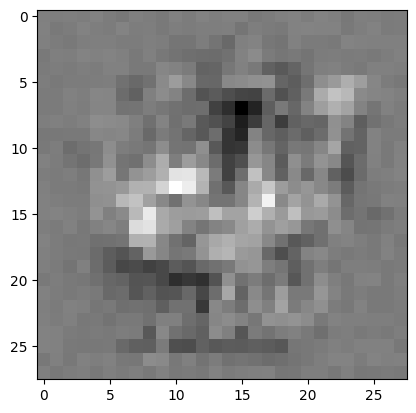

Época: (45/100)
Perda: 0.04559369757771492
Acurácia: 1.0

Nº 4:


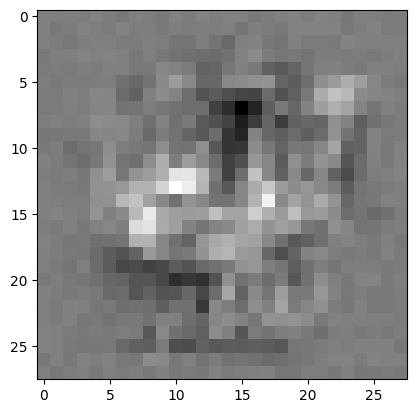

Época: (46/100)
Perda: 0.045548491179943085
Acurácia: 1.0

Nº 4:


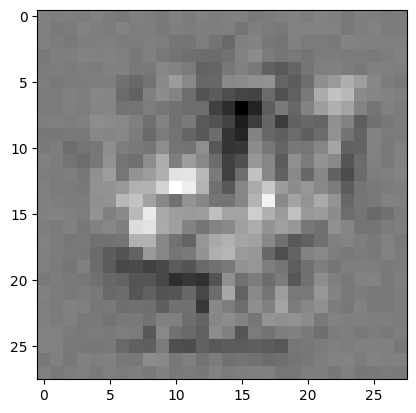

Época: (47/100)
Perda: 0.04550338163971901
Acurácia: 1.0

Nº 4:


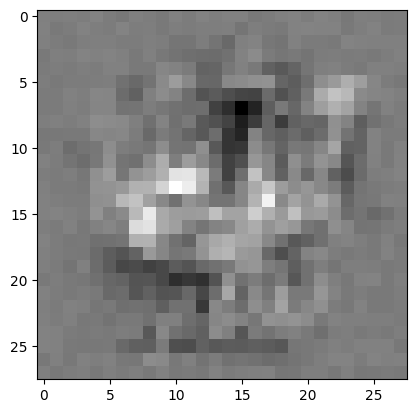

Época: (48/100)
Perda: 0.0454583503305912
Acurácia: 1.0

Nº 4:


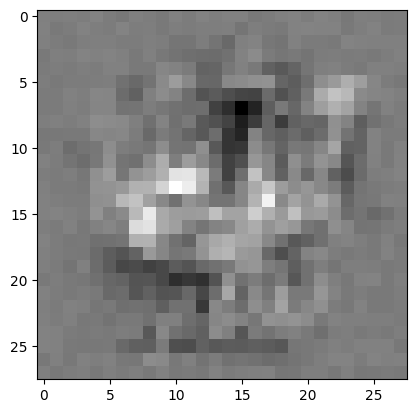

Época: (49/100)
Perda: 0.04541340097784996
Acurácia: 1.0

Nº 4:


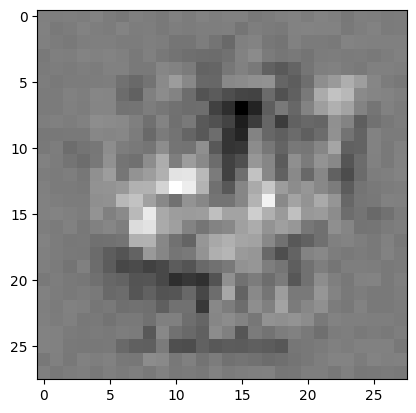

Época: (50/100)
Perda: 0.04536854475736618
Acurácia: 1.0

Nº 4:


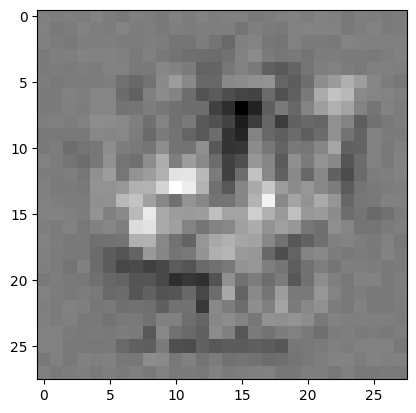

Época: (51/100)
Perda: 0.045323777943849564
Acurácia: 1.0

Nº 4:


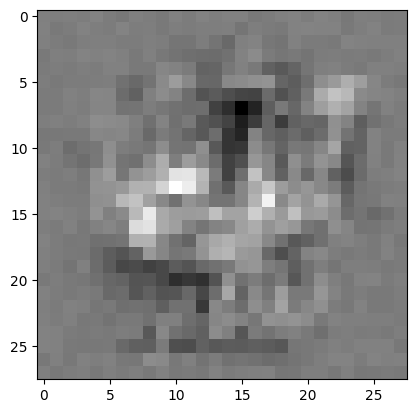

Época: (52/100)
Perda: 0.045279085636138916
Acurácia: 1.0

Nº 4:


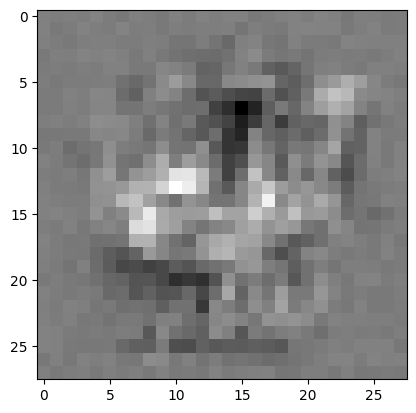

Época: (53/100)
Perda: 0.04523449018597603
Acurácia: 1.0

Nº 4:


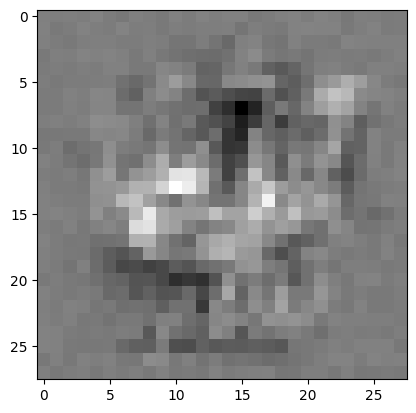

Época: (54/100)
Perda: 0.045189980417490005
Acurácia: 1.0

Nº 4:


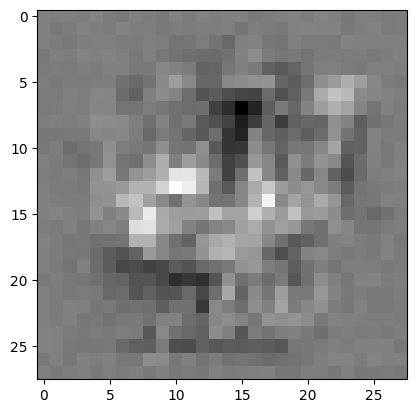

Época: (55/100)
Perda: 0.04514554888010025
Acurácia: 1.0

Nº 4:


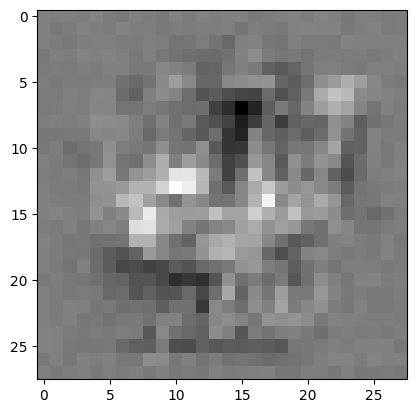

Época: (56/100)
Perda: 0.04510120302438736
Acurácia: 1.0

Nº 4:


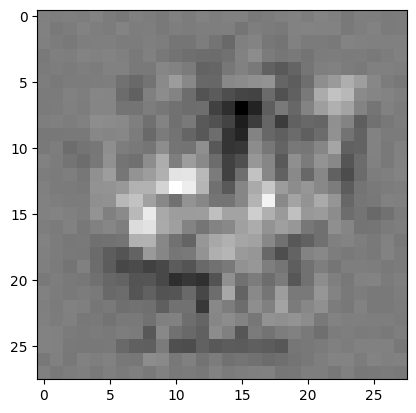

Época: (57/100)
Perda: 0.045056942850351334
Acurácia: 1.0

Nº 4:


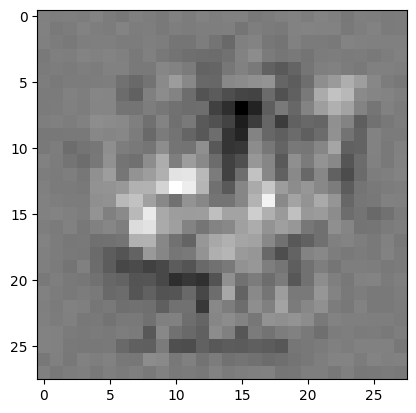

Época: (58/100)
Perda: 0.045012764632701874
Acurácia: 1.0

Nº 4:


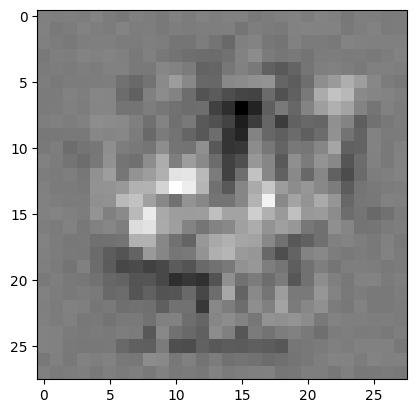

Época: (59/100)
Perda: 0.04496867582201958
Acurácia: 1.0

Nº 4:


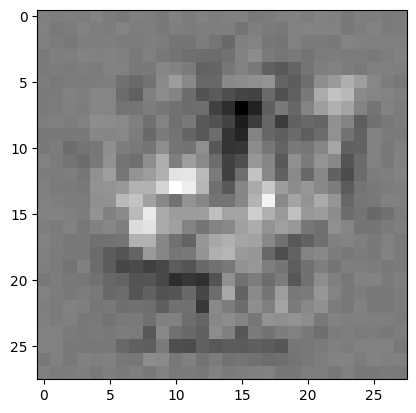

Época: (60/100)
Perda: 0.04492466524243355
Acurácia: 1.0

Nº 4:


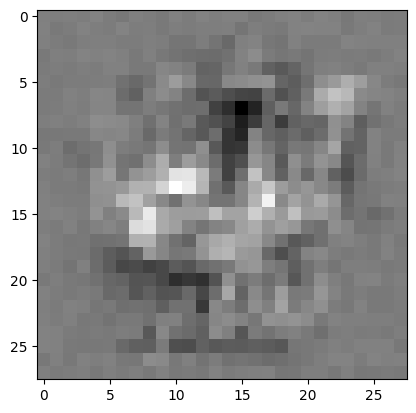

Época: (61/100)
Perda: 0.044880740344524384
Acurácia: 1.0

Nº 4:


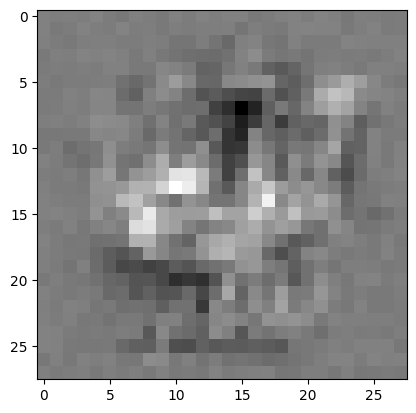

Época: (62/100)
Perda: 0.04483690485358238
Acurácia: 1.0

Nº 4:


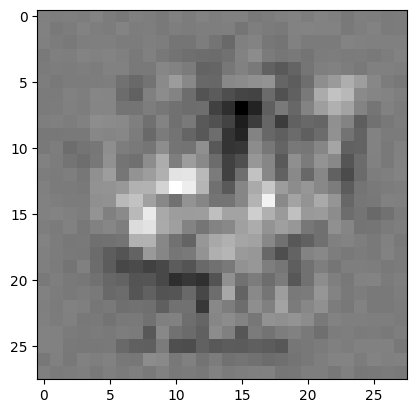

Época: (63/100)
Perda: 0.044793155044317245
Acurácia: 1.0

Nº 4:


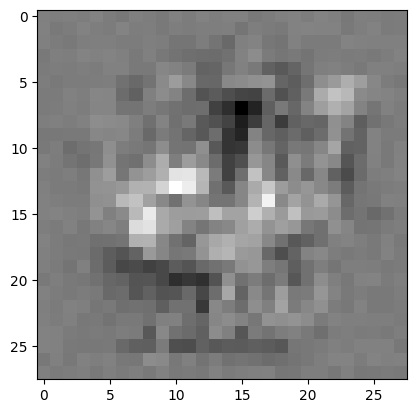

Época: (64/100)
Perda: 0.04474947974085808
Acurácia: 1.0

Nº 4:


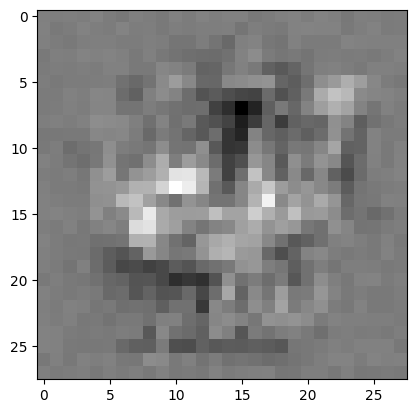

Época: (65/100)
Perda: 0.04470587894320488
Acurácia: 1.0

Nº 4:


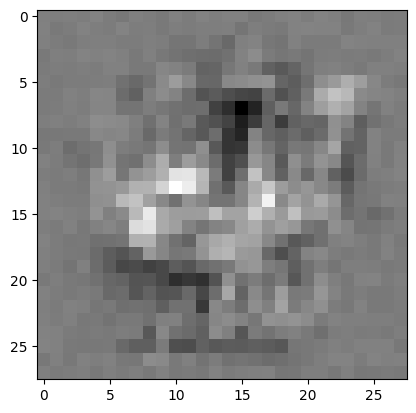

Época: (66/100)
Perda: 0.04466237500309944
Acurácia: 1.0

Nº 4:


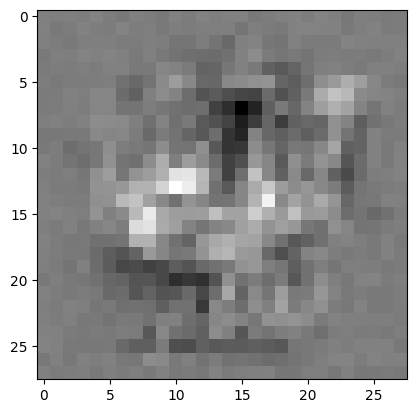

Época: (67/100)
Perda: 0.044618941843509674
Acurácia: 1.0

Nº 4:


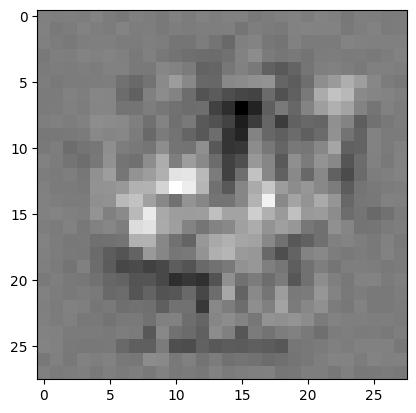

Época: (68/100)
Perda: 0.04457560554146767
Acurácia: 1.0

Nº 4:


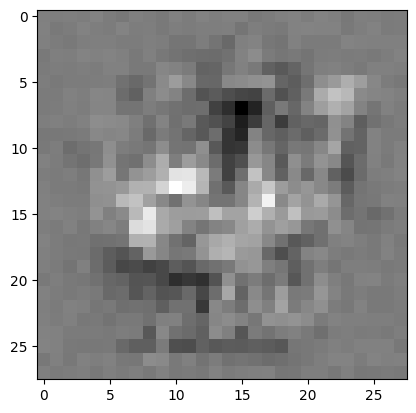

Época: (69/100)
Perda: 0.04453234374523163
Acurácia: 1.0

Nº 4:


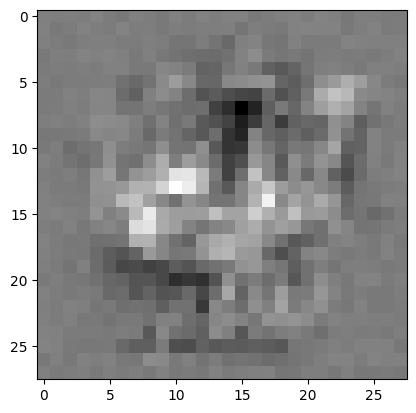

Época: (70/100)
Perda: 0.04448916018009186
Acurácia: 1.0

Nº 4:


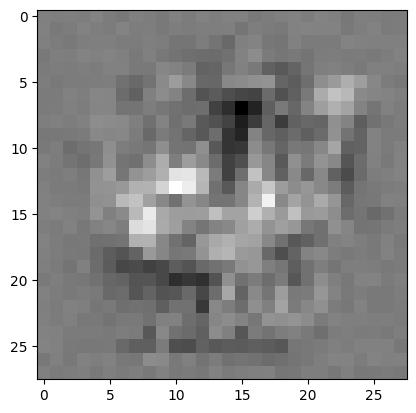

Época: (71/100)
Perda: 0.04444606229662895
Acurácia: 1.0

Nº 4:


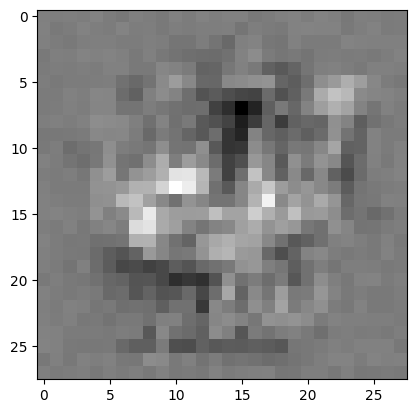

Época: (72/100)
Perda: 0.044403038918972015
Acurácia: 1.0

Nº 4:


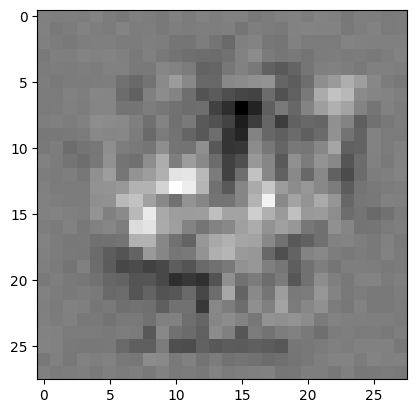

Época: (73/100)
Perda: 0.044360097497701645
Acurácia: 1.0

Nº 4:


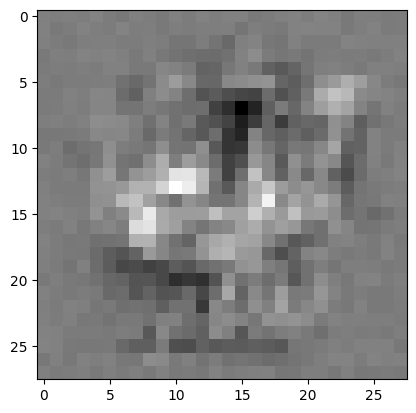

Época: (74/100)
Perda: 0.044317252933979034
Acurácia: 1.0

Nº 4:


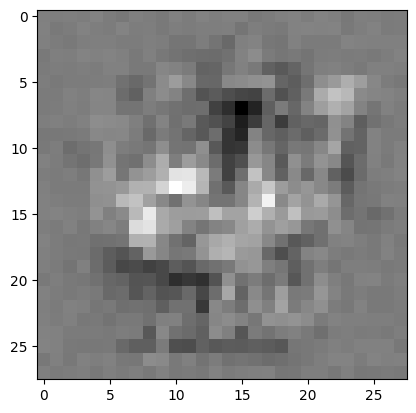

Época: (75/100)
Perda: 0.0442744679749012
Acurácia: 1.0

Nº 4:


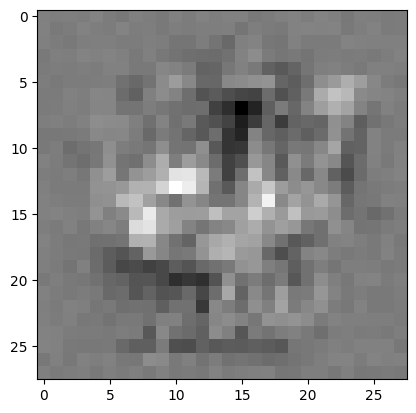

Época: (76/100)
Perda: 0.044231779873371124
Acurácia: 1.0

Nº 4:


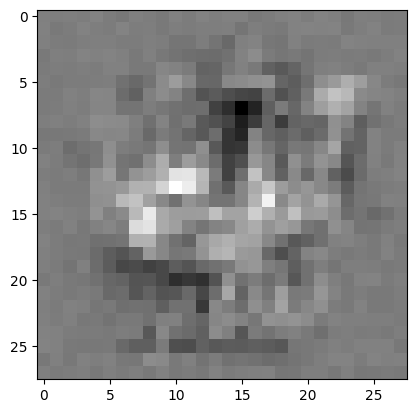

Época: (77/100)
Perda: 0.04418916255235672
Acurácia: 1.0

Nº 4:


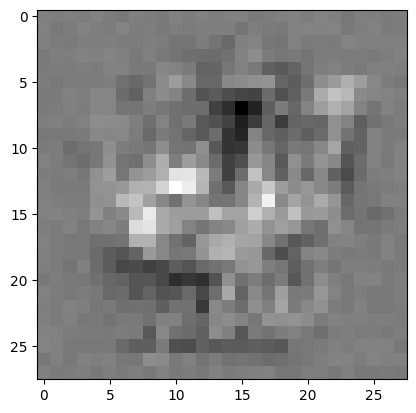

Época: (78/100)
Perda: 0.04414663091301918
Acurácia: 1.0

Nº 4:


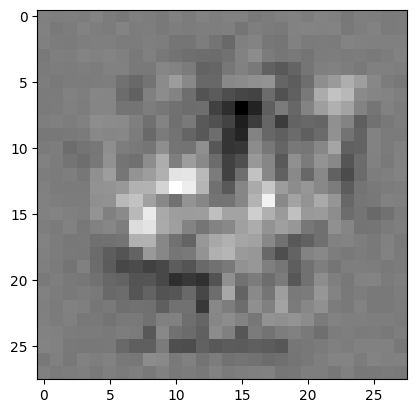

Época: (79/100)
Perda: 0.04410416632890701
Acurácia: 1.0

Nº 4:


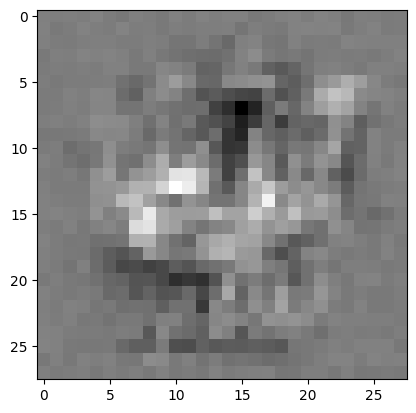

Época: (80/100)
Perda: 0.04406179115176201
Acurácia: 1.0

Nº 4:


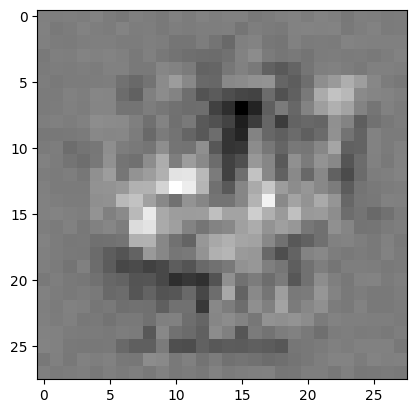

Época: (81/100)
Perda: 0.04401949793100357
Acurácia: 1.0

Nº 4:


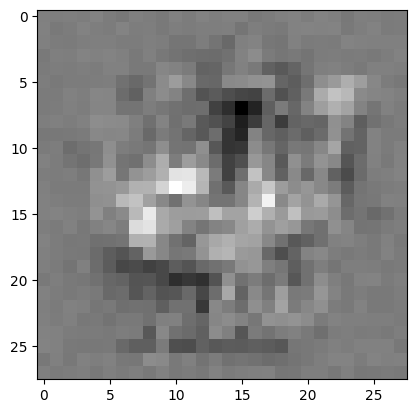

Época: (82/100)
Perda: 0.0439772754907608
Acurácia: 1.0

Nº 4:


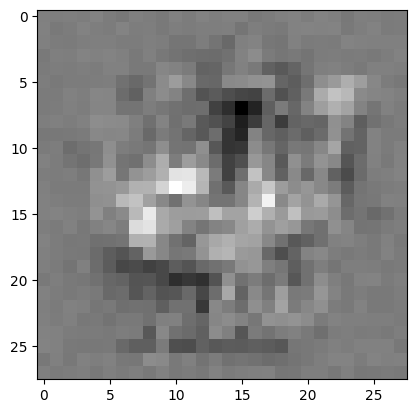

Época: (83/100)
Perda: 0.0439351350069046
Acurácia: 1.0

Nº 4:


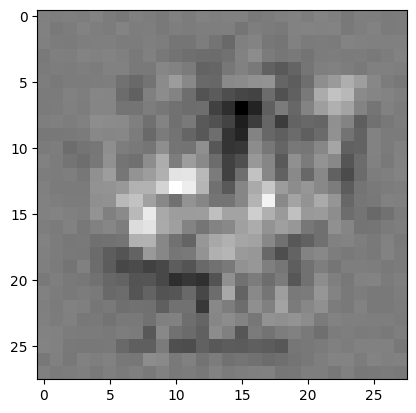

Época: (84/100)
Perda: 0.04389307647943497
Acurácia: 1.0

Nº 4:


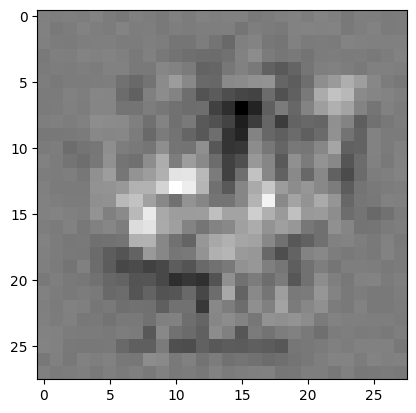

Época: (85/100)
Perda: 0.0438510961830616
Acurácia: 1.0

Nº 4:


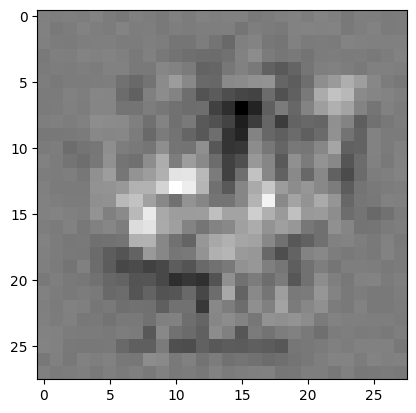

Época: (86/100)
Perda: 0.043809182941913605
Acurácia: 1.0

Nº 4:


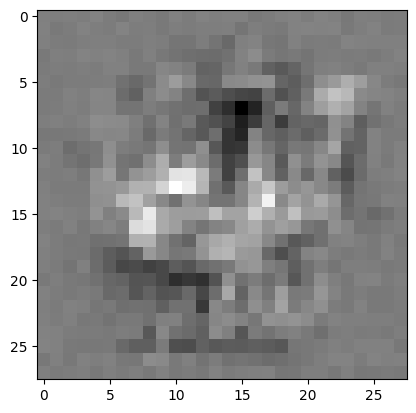

Época: (87/100)
Perda: 0.043767351657152176
Acurácia: 1.0

Nº 4:


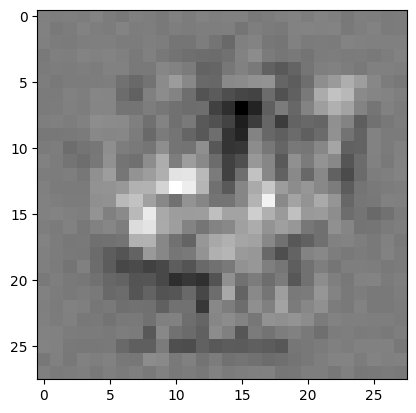

Época: (88/100)
Perda: 0.04372561350464821
Acurácia: 1.0

Nº 4:


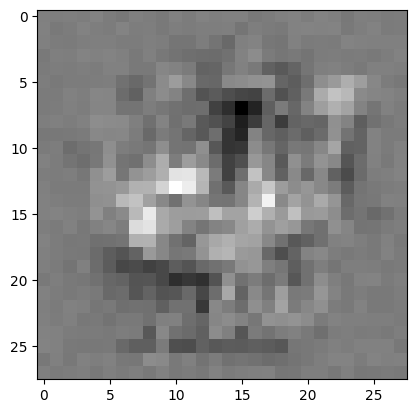

Época: (89/100)
Perda: 0.04368393495678902
Acurácia: 1.0

Nº 4:


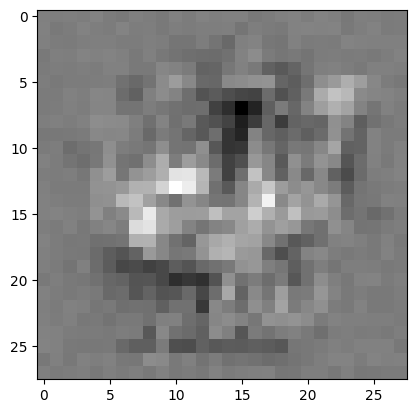

Época: (90/100)
Perda: 0.043642349541187286
Acurácia: 1.0

Nº 4:


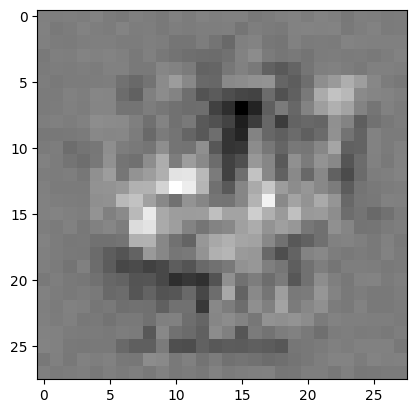

Época: (91/100)
Perda: 0.04360082745552063
Acurácia: 1.0

Nº 4:


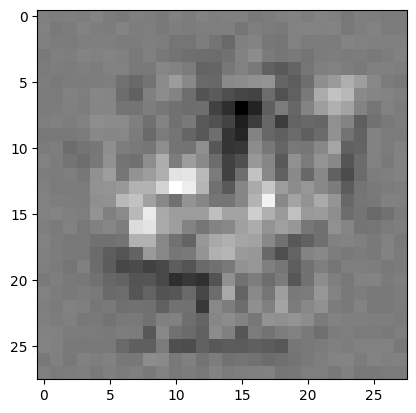

Época: (92/100)
Perda: 0.04355938732624054
Acurácia: 1.0

Nº 4:


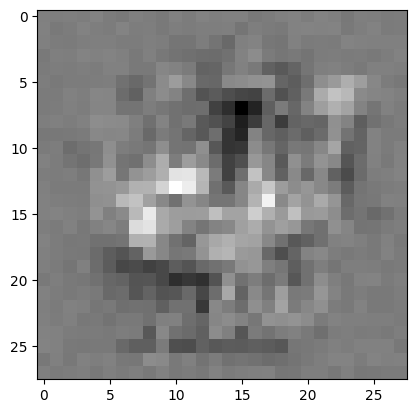

Época: (93/100)
Perda: 0.04351801425218582
Acurácia: 1.0

Nº 4:


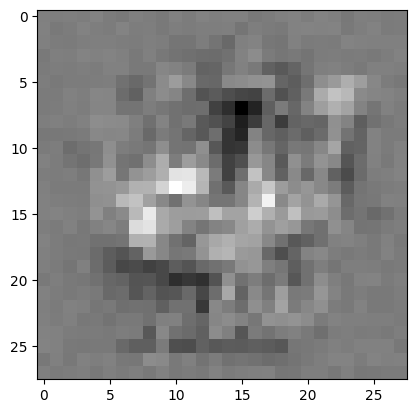

Época: (94/100)
Perda: 0.043476734310388565
Acurácia: 1.0

Nº 4:


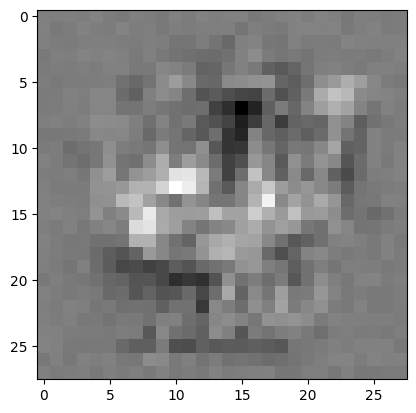

Época: (95/100)
Perda: 0.04343552142381668
Acurácia: 1.0

Nº 4:


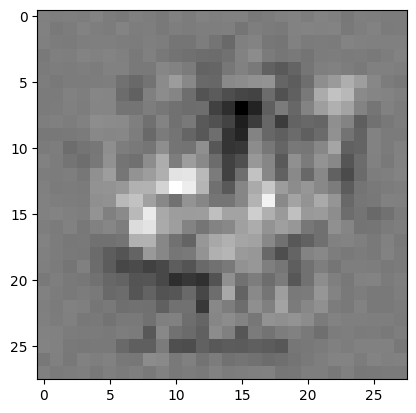

Época: (96/100)
Perda: 0.043394383043050766
Acurácia: 1.0

Nº 4:


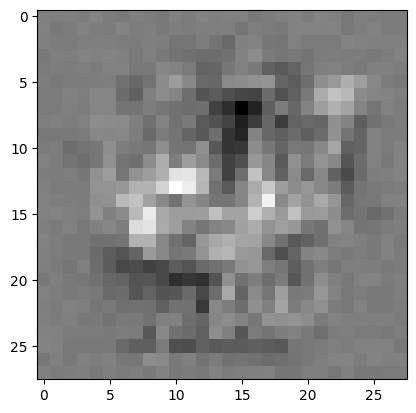

Época: (97/100)
Perda: 0.04335332661867142
Acurácia: 1.0

Nº 4:


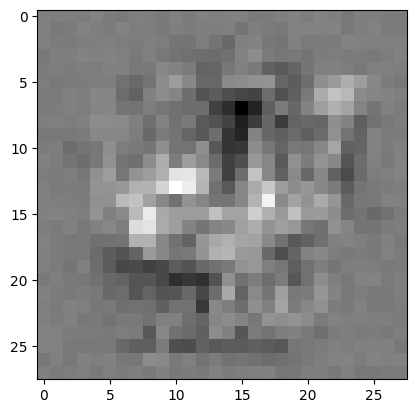

Época: (98/100)
Perda: 0.04331233724951744
Acurácia: 1.0

Nº 4:


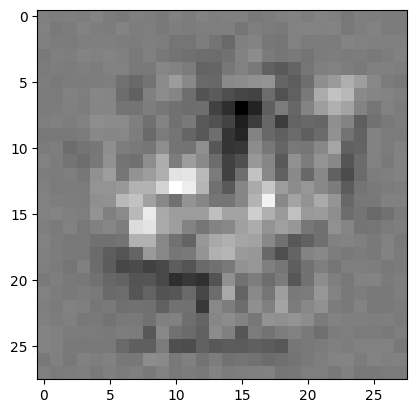

Época: (99/100)
Perda: 0.04327143356204033
Acurácia: 1.0

Nº 4:


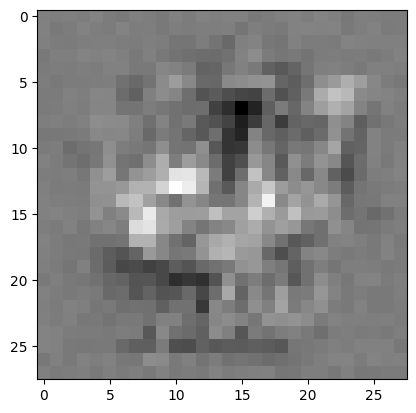

Época: (100/100)
Perda: 0.04323059320449829
Acurácia: 1.0

Nº 4:


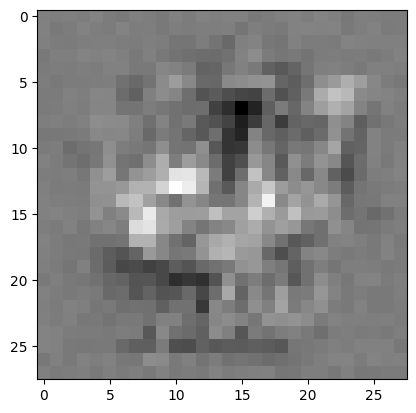

In [34]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    print(f'Época: ({i+1}/{epochs})')
    print(f'Perda: {loss.data}')
    print(f'Acurácia: {accuracy}\n')

    weights = model.state_dict()['weight']
    bias = model.state_dict()['bias']

    print(f'Nº 4:')

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()


In [19]:
print('Final loss:', loss.item())

Final loss: 0.26598671078681946


### Visualizando gráfico de perda durante o treinamento

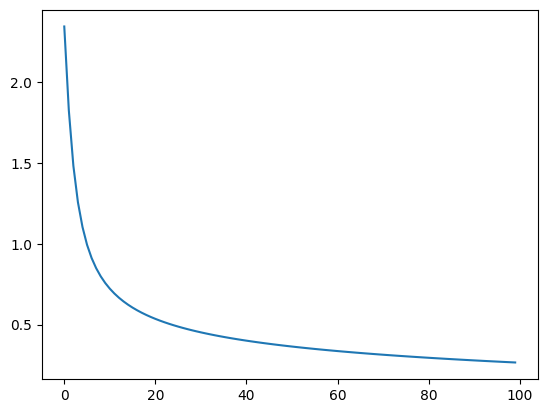

In [20]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [21]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.941


### Matriz de confusão com dados de treinamento e teste

In [22]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,1,3,1,0
2,0,1,91,1,0,1,0,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,1,2,0,3
5,0,2,0,1,0,81,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,110,0,3
8,0,2,2,0,0,2,1,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


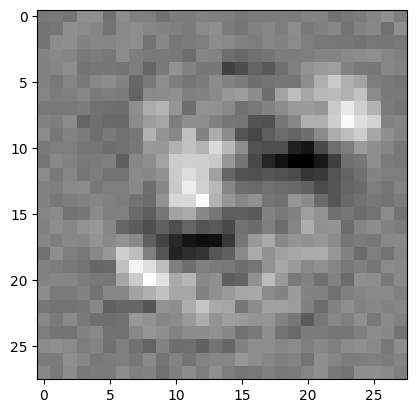

In [23]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[5, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

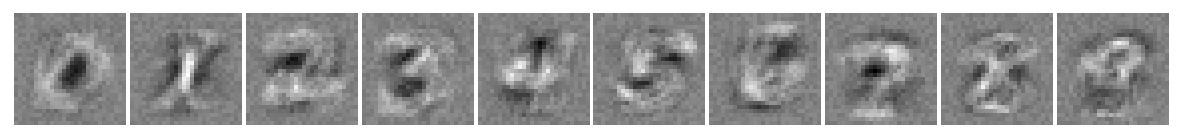

In [24]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede? R.: (1000. 28, 28)
2. Qual é o shape da saída da rede? R.: (1000, 10)
3. Qual é o número total de parâmetros da rede, incluindo o bias? (28*28*10+10) = 7850

# Aprendizados
